# Import

In [7]:
import numpy as np
import pandas as pd
import random
import re
import matplotlib.pyplot as plt
import seaborn as sns

# Library Bantuan
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')


# Library Sendiri
from libraryBantuan.katla import Katla
from libraryBantuan.gameKatla import GameKatla

# Konstanta
PATH_FILE_TEXT = "D:\\Rama Nitip\\python\\katla\\file text\\"

# Baca Data

In [8]:
daftar_kata = list(pd.read_csv(PATH_FILE_TEXT + 'lima huruf katla.csv', header=None)[0])
list_jawaban = random.choices(daftar_kata, k=20)
print(f"Banyak Kata : {len(daftar_kata)}")

Banyak Kata : 8314


In [9]:
list_jawaban = ['punai', 'danuh', 'tiket', 'subur', 'tibum', 'megak', 'sanca', 'burok', 'pagun', 'uring', 'saber', 'bubul', 'bursa', 'hibob', 'umrat', 'lanas', 'titit', 'lapir', 'cocor', 'gemak']
jumlah_bertanya = {}

for idx, jawaban in enumerate(list_jawaban):
    print(f"Permainan ke {idx} : {jawaban}")
    katla = Katla(daftar_kata)
    game = GameKatla(daftar_kata, jawaban)
    tanya = 0

    tebakan = "sarit"
    pola = game.evaluasi_tebakan(tebakan)
    tanya += 1
    print(f"Tebakan:{tebakan};  Pola:{pola}")

    while pola != "!!!!!":
        tebakan = katla.tebakan_selanjutnya(tebakan, pola)
        pola    = game.evaluasi_tebakan(tebakan)
        tanya  += 1 
        print(f"Tebakan:{tebakan};  Pola:{pola}")

    if tanya in jumlah_bertanya:
        jumlah_bertanya[tanya] += 1
    else:
        jumlah_bertanya[tanya] = 1
    print(f"Selesai dalam {tanya} tebakan\n")


Permainan ke 0 : punai
Tebakan:sarit;  Pola:*?*?*
Tebakan:kulan;  Pola:*!*!?
Tebakan:abadi;  Pola:?***!
Tebakan:abadi;  Pola:?***!


KeyboardInterrupt: 

# Pakai kata yang peluang jadi jawaban saja

,tanya,banyaknya
3,2,1
2,3,4
0,4,9
1,5,5
4,8,1


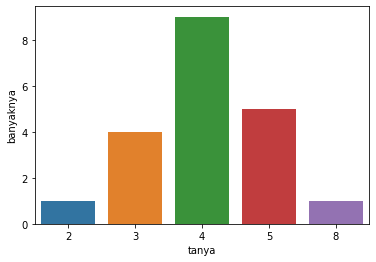

In [6]:
df = pd.DataFrame({'tanya':jumlah_bertanya.keys(), 'banyaknya':jumlah_bertanya.values()}).sort_values(by='tanya')
display(df)

sns.barplot(x=df['tanya'], y=df['banyaknya']);

# Pakai semua daftar kata tiap nebak

,tanya,banyaknya
4,3,3
3,4,5
1,5,6
5,6,5
0,7,4
2,8,3


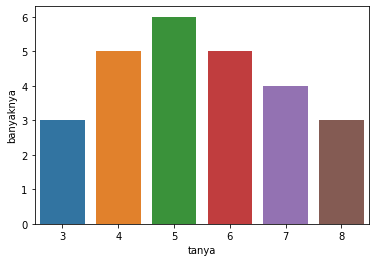

In [ ]:
df = pd.DataFrame({'tanya':jumlah_bertanya.keys(), 'banyaknya':jumlah_bertanya.values()}).sort_values(by='tanya')
df['banyaknya'] = df['banyaknya'].apply(lambda x:x+1)
display(df)

sns.barplot(x=df['tanya'], y=df['banyaknya']);